# Multilayer Perceptron (MLP)
**Student Name:** Ashraful Islam Tanzil  
**ID:** 0112230028

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
df_train = pd.read_csv('../../dataset/MLP/mnist_train.csv')
df_test = pd.read_csv('../../dataset/MLP/mnist_test.csv')

X_train = df_train.iloc[:, 1:].values / 255.0
y_train = df_train.iloc[:, 0].values

X_test = df_test.iloc[:, 1:].values / 255.0
y_test = df_test.iloc[:, 0].values

print(f'Training shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Training shape: (60000, 784)
Test shape: (10000, 784)


In [3]:
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    max_iter=20,
    batch_size=64,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.4f}')
print(f'\nClassification Report:')
print(classification_report(y_test, y_pred, digits=3))

Accuracy: 0.9772

Classification Report:
              precision    recall  f1-score   support

           0      0.990     0.980     0.985       980
           1      0.993     0.991     0.992      1135
           2      0.982     0.978     0.980      1032
           3      0.957     0.981     0.969      1010
           4      0.976     0.970     0.973       982
           5      0.972     0.972     0.972       892
           6      0.990     0.966     0.978       958
           7      0.976     0.982     0.979      1028
           8      0.974     0.971     0.973       974
           9      0.961     0.977     0.969      1009

    accuracy                          0.977     10000
   macro avg      0.977     0.977     0.977     10000
weighted avg      0.977     0.977     0.977     10000



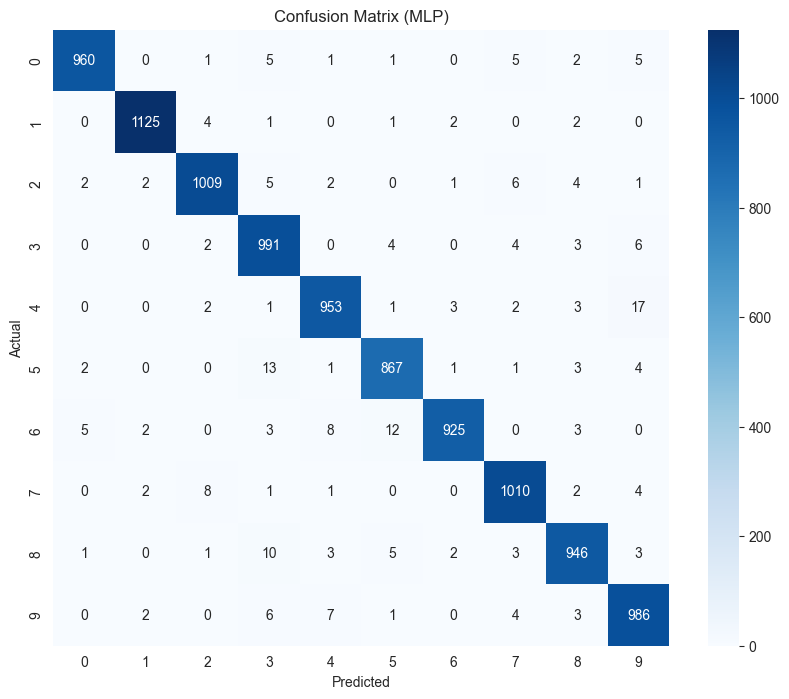

In [4]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (MLP)')
plt.show()